In [1]:
import numpy as np 
import pandas as pd 
import string 
import spacy
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [19]:
elon = pd.read_csv("Elon_musk.csv",encoding='cp1252',index_col=0)
elon

Text
1                                @kunalb11 I’m an alien
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
3                   @joerogan @Spotify Great interview!
4                       @gtera27 Doge is underestimated
5     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1995  @flcnhvy True, it sounds so surreal, but the n...
1996  @PPathole Make sure to read ur terms &amp; con...
1997                @TeslaGong @PPathole Samwise Gamgee
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1999                          Progress update August 28

[1999 rows x 1 columns]

In [20]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [21]:
for t in elon.Text:
    print(t)

@kunalb11 I’m an alien
@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated
@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
Happy New Year of the Ox! https://t.co/9WFKMYu2oj
Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
The most entertaining outcome is the most likely
@GiveDirectly Just sent some
Just agree to do Clubhouse with @kanyewest
https://t.co/3rWE9uHSTS
@geoffkeighley @UnrealEngine It’s getting real
Bought some Dogecoin for lil X, so he can be a toddler hodler
@JoshManMode He definitely has issues, but the sentencing seems a bit high
@freewalletorg Thanks for fixing
@freewalletorg Please unlock my account
@AstroJordy <U+0001F923><U+0001F923

In [22]:
elon = [t.strip() for t in elon.Text]
elon = [x for x in elon if x] 
elon[0:5]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [23]:
text = ' '.join(elon)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [24]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', '

In [28]:
len(text_tokens)

21785

In [29]:
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
print(my_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#Remove stopwords
my_stop_words.append('the')
my_stop_words.append('Its')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10']


In [31]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it', '’', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewallet

In [33]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it', '’', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001

In [34]:
nlp = spacy.load('en_core_web_sm') 

In [35]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would


In [36]:
lemmas = [word.lemma_ for word in doc]
print(lemmas)

['kunalb11', 'I', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'just', 'send', 'just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'it', "'", 'get', 'real', 'buy', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'u

In [37]:
# Feature Extraction

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(elon)

In [38]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

0
kunalb11       2714
an              500
alien           460
id_aa_carmack  2382
ray            3851
...             ...
clicking       1099
accept          355
samwise        4089
gamgee         2034
altho           479

[5453 rows x 1 columns]

In [39]:
vectorizer.vocabulary_ 

{'kunalb11': 2714,
 'an': 500,
 'alien': 460,
 'id_aa_carmack': 2382,
 'ray': 3851,
 'tracing': 4863,
 'on': 3381,
 'cyberpunk': 1319,
 'with': 5284,
 'hdr': 2239,
 'is': 2536,
 'next': 3267,
 'level': 2803,
 'have': 2228,
 'you': 5399,
 'tried': 4885,
 'it': 2543,
 'joerogan': 2610,
 'spotify': 4422,
 'great': 2144,
 'interview': 2513,
 'gtera27': 2164,
 'doge': 1502,
 'underestimated': 4979,
 'teslacn': 4687,
 'congratulations': 1198,
 'tesla': 4679,
 'china': 1061,
 'for': 1942,
 'amazing': 489,
 'execution': 1763,
 'last': 2750,
 'year': 5385,
 'now': 3315,
 'to': 4812,
 'the': 4733,
 'even': 1733,
 'more': 3159,
 'happy': 2210,
 'new': 3264,
 'of': 3361,
 'ox': 3462,
 'https': 2347,
 'co': 1115,
 '9wfkmyu2oj': 322,
 'frodo': 1986,
 'was': 5182,
 'underdoge': 4978,
 'all': 463,
 'thought': 4774,
 'he': 2241,
 'would': 5315,
 'fail': 1808,
 'himself': 2292,
 'most': 3164,
 'zgxjfdzzrm': 5430,
 'owensparks_': 3458,
 'flcnhvy': 1913,
 'anonyx10': 520,
 'haha': 2190,
 'thanks': 4726,
 

In [40]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(10)

0
000       0
0001f1e6  1
0001f1e7  2
0001f1e8  3
0001f1e9  4
0001f1ea  5
0001f1f4  6
0001f1f8  7
0001f1fa  8
0001f30e  9

In [41]:
print(vectorizer.vocabulary_)

{'kunalb11': 2714, 'an': 500, 'alien': 460, 'id_aa_carmack': 2382, 'ray': 3851, 'tracing': 4863, 'on': 3381, 'cyberpunk': 1319, 'with': 5284, 'hdr': 2239, 'is': 2536, 'next': 3267, 'level': 2803, 'have': 2228, 'you': 5399, 'tried': 4885, 'it': 2543, 'joerogan': 2610, 'spotify': 4422, 'great': 2144, 'interview': 2513, 'gtera27': 2164, 'doge': 1502, 'underestimated': 4979, 'teslacn': 4687, 'congratulations': 1198, 'tesla': 4679, 'china': 1061, 'for': 1942, 'amazing': 489, 'execution': 1763, 'last': 2750, 'year': 5385, 'now': 3315, 'to': 4812, 'the': 4733, 'even': 1733, 'more': 3159, 'happy': 2210, 'new': 3264, 'of': 3361, 'ox': 3462, 'https': 2347, 'co': 1115, '9wfkmyu2oj': 322, 'frodo': 1986, 'was': 5182, 'underdoge': 4978, 'all': 463, 'thought': 4774, 'he': 2241, 'would': 5315, 'fail': 1808, 'himself': 2292, 'most': 3164, 'zgxjfdzzrm': 5430, 'owensparks_': 3458, 'flcnhvy': 1913, 'anonyx10': 520, 'haha': 2190, 'thanks': 4726, 'indeed': 2445, 'tweets': 4930, 'definitely': 1386, 'do': 149

In [42]:
print(vectorizer.get_feature_names_out()[0:100])

['000' '0001f1e6' '0001f1e7' '0001f1e8' '0001f1e9' '0001f1ea' '0001f1f4'
 '0001f1f8' '0001f1fa' '0001f30e' '0001f338' '0001f339' '0001f353'
 '0001f381' '0001f3a9' '0001f3af' '0001f3b6' '0001f3b7' '0001f3dd'
 '0001f409' '0001f40d' '0001f410' '0001f43b' '0001f440' '0001f446'
 '0001f447' '0001f44c' '0001f44d' '0001f476' '0001f47b' '0001f484'
 '0001f495' '0001f4a8' '0001f4a9' '0001f4ab' '0001f4af' '0001f4b0'
 '0001f4b5' '0001f525' '0001f534' '0001f54a' '0001f5a4' '0001f600'
 '0001f603' '0001f608' '0001f609' '0001f60e' '0001f60f' '0001f610'
 '0001f622' '0001f62c' '0001f62e' '0001f634' '0001f680' '0001f6f0'
 '0001f914' '0001f917' '0001f918' '0001f920' '0001f923' '0001f9d9'
 '0001f9db' '0001fa82' '041a' '041e' '0430' '0431' '0432' '0434' '0435'
 '0438' '043a' '043b' '043c' '043d' '043e' '043f' '0440' '0441' '044b'
 '044c' '0451' '05' '07puoramgo' '095whx44bx' '0ckvhrmtf1' '0ct2svangy'
 '0gutz4kgij' '0kaav0dtnn' '0rc72s0zay' '0s0ybscm0p' '0srlfg03fg'
 '0vas3cck9p' '0y5fkvqpk8' '10' '100' '1000

In [43]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
np.shape(X.toarray())

(1999, 5453)

In [46]:
# Let's see how can bigrams and trigrams can be included here

vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 500)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(elon)

In [47]:
bow_matrix_ngram

<1999x500 sparse matrix of type '<class 'numpy.int64'>'
	with 14728 stored elements in Compressed Sparse Row format>

In [48]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['0001f525' '0001f5a4' '0001f923' '0001f923 0001f923' '20' '28delayslater'
 '60' 'about' 'absolutely' 'accurate' 'actually' 'after' 'ai'
 'ajtourville' 'all' 'almost' 'also' 'although' 'am' 'amazing' 'amp' 'an'
 'and' 'any' 'appreciated' 'archillect' 'are' 'as' 'astro_doug'
 'astrobehnken' 'astrojordy' 'astronauts' 'at' 'at tesla'
 'austinbarnard45' 'autopilot' 'back' 'bad' 'bar' 'be' 'be great' 'been'
 'being' 'berlin' 'berniesanders' 'best' 'beta' 'better' 'between' 'big'
 'bit' 'boca' 'bocachicagal' 'body' 'booster' 'boringcompany' 'both'
 'build' 'but' 'but it' 'but we' 'by' 'c_bass3d' 'can' 'car' 'cargo'
 'cars' 'caspar_stanley' 'cleantechnica' 'close' 'co' 'come' 'coming'
 'coming soon' 'companies' 'confirmed' 'congratulations' 'cool' 'cost'
 'could' 'crew' 'crew dragon' 'data' 'day' 'days' 'definitely' 'design'
 'did' 'different' 'djsnm' 'do' 'doesn' 'doge' 'doing' 'dojo' 'don' 'done'
 'down' 'dragon' 'driving' 'droneship' 'early' 'earth' 'easy' 'electric'
 'energy' 'engine' 'en

In [49]:
np.shape(bow_matrix_ngram.toarray())

(1999, 500)

In [51]:
# TFidf vectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features = 200)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(elon)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f923' '0001f923 0001f923' 'about' 'actually' 'ai' 'ajtourville'
 'all' 'also' 'amp' 'an' 'and' 'are' 'as' 'at' 'austinbarnard45' 'back'
 'be' 'berniesanders' 'best' 'better' 'booster' 'but' 'by' 'can' 'car'
 'cleantechnica' 'co' 'coming' 'cool' 'could' 'crew' 'day' 'djsnm' 'do'
 'don' 'down' 'dragon' 'earth' 'engine' 'engineering' 'engineers_feed'
 'engines' 'ercxspace' 'erdayastronaut' 'erdayastronaut spacex' 'evafoxu'
 'even' 'ever' 'exactly' 'falcon' 'fe0f' 'felixschlang' 'few' 'first'
 'flcnhvy' 'flight' 'for' 'for the' 'from' 'fsd' 'future' 'get' 'go'
 'good' 'great' 'haha' 'hard' 'has' 'have' 'he' 'high' 'https' 'https co'
 'icannot_enough' 'id_aa_carmack' 'if' 'in' 'in the' 'is' 'is the' 'it'
 'it will' 'just' 'kristennetten' 'landing' 'launch' 'lexfridman' 'life'
 'like' 'long' 'lot' 'lot of' 'make' 'many' 'marcushousegame' 'mars'
 'maybe' 'me' 'mission' 'model' 'more' 'most' 'much' 'my' 'nasa'
 'nasaspaceflight' 'need' 'neuralink' 'new' 'next' 'no' 'not' 'now' 'of'
 'of 

In [52]:
np.shape(tf_idf_matrix_n_gram_max_features.toarray())

(1999, 200)

In [53]:
# Generate wordCloud

text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

(-0.5, 2999.5, 1999.5, -0.5)

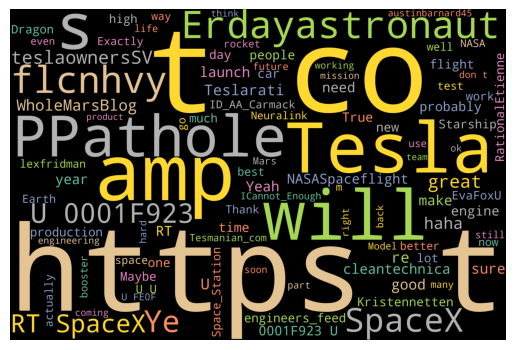

In [57]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)

plt.imshow(wordcloud)
plt.axis("off")

In [59]:
# Emotion Mining

elon1 = pd.read_csv("Elon_musk.csv",encoding='cp1252',index_col=0)
elon1

Text
1                                @kunalb11 I’m an alien
2     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
3                   @joerogan @Spotify Great interview!
4                       @gtera27 Doge is underestimated
5     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1995  @flcnhvy True, it sounds so surreal, but the n...
1996  @PPathole Make sure to read ur terms &amp; con...
1997                @TeslaGong @PPathole Samwise Gamgee
1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1999                          Progress update August 28

[1999 rows x 1 columns]

In [60]:
elon1 = [t.strip() for t in elon1.Text]
elon1 = [x for x in elon1 if x] 
elon1[0:5]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [62]:
text1 = str.lower(" ".join(elon1))

In [63]:
text1

'@kunalb11 i’m an alien @id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? @joerogan @spotify great interview! @gtera27 doge is underestimated @teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! https://t.co/9wfkmyu2oj frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm @owensparks_ @flcnhvy @anonyx10 haha thanks :) @flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely @givedirectly just sent some just agree to do clubhouse with @kanyewest https://t.co/3rwe9uhsts @geoffkeighley @unrealengine it’s getting real bought some dogecoin for lil x, so he can be a toddler hodler @joshmanmode he definitely has issues, but the sentencing seems a bit high @freewalletorg thanks for fixing @freewalletorg please unlock my account @astrojordy <u+0001f923><u+0001f

In [64]:
nlp = spacy.load('en_core_web_sm')
elon_block = nlp(text1)
elon_block

@kunalb11 i’m an alien @id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? @joerogan @spotify great interview! @gtera27 doge is underestimated @teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! https://t.co/9wfkmyu2oj frodo was the underdoge,
all thought he would fail,
himself most of all. https://t.co/zgxjfdzzrm @owensparks_ @flcnhvy @anonyx10 haha thanks :) @flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely @givedirectly just sent some just agree to do clubhouse with @kanyewest https://t.co/3rwe9uhsts @geoffkeighley @unrealengine it’s getting real bought some dogecoin for lil x, so he can be a toddler hodler @joshmanmode he definitely has issues, but the sentencing seems a bit high @freewalletorg thanks for fixing @freewalletorg please unlock my account @astrojordy <u+0001f923><u+0001f923

In [65]:
spacy.displacy.render(elon_block, style='ent', jupyter=True)

In [66]:
[token.text for token in elon_block]

['@kunalb11',
 'i',
 '’m',
 'an',
 'alien',
 '@id_aa_carmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'next',
 '-',
 'level',
 '.',
 'have',
 'you',
 'tried',
 'it',
 '?',
 '@joerogan',
 '@spotify',
 'great',
 'interview',
 '!',
 '@gtera27',
 'doge',
 'is',
 'underestimated',
 '@teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 '!',
 'https://t.co/9wfkmyu2oj',
 'frodo',
 'was',
 'the',
 'underdoge',
 ',',
 '\n',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 '\n',
 'himself',
 'most',
 'of',
 'all',
 '.',
 'https://t.co/zgxjfdzzrm',
 '@owensparks',
 '_',
 '@flcnhvy',
 '@anonyx10',
 'haha',
 'thanks',
 ':)',
 '@flcnhvy',
 '@anonyx10',
 'indeed',
 '!',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 '-',
 'world',
 'time',
 'allocation',
 '.',
 'the',
 'mos

In [67]:
for token in elon_block:
    print(token.text,token.pos_)

@kunalb11 PROPN
i PRON
’m VERB
an DET
alien ADJ
@id_aa_carmack PROPN
ray NOUN
tracing VERB
on ADP
cyberpunk NOUN
with ADP
hdr PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
have AUX
you PRON
tried VERB
it PRON
? PUNCT
@joerogan X
@spotify VERB
great ADJ
interview NOUN
! PUNCT
@gtera27 PROPN
doge PROPN
is AUX
underestimated VERB
@teslacn PROPN
congratulations PROPN
tesla NOUN
china PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT
happy ADJ
new ADJ
year NOUN
of ADP
the DET
ox NOUN
! PUNCT
https://t.co/9wfkmyu2oj PROPN
frodo NOUN
was AUX
the DET
underdoge ADJ
, PUNCT

 SPACE
all PRON
thought VERB
he PRON
would AUX
fail VERB
, PUNCT

 SPACE
himself PRON
most ADJ
of ADP
all PRON
. PUNCT
https://t.co/zgxjfdzzrm PROPN
@owensparks X
_ PUNCT
@flcnhvy PROPN
@anonyx10 PROPN
haha INTJ
thanks NOUN
:) PUNCT
@flcnhvy PROPN
@anonyx10 PROPN
indeed ADV
! PUNCT
tweets NOUN
definitely ADV
do AUX
not PART


In [68]:
nouns_verbs = [token.text for token in elon_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['’m', 'ray', 'tracing', 'cyberpunk', 'level', 'tried', '@spotify', 'interview', 'underestimated', 'tesla', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'thanks', 'tweets', 'represent', 'world', 'time', 'allocation', 'outcome', 'sent', 'agree', 'do', 'clubhouse', 'https://t.co/3rwe9uhsts', '@geoffkeighley', '@unrealengine', 'getting', 'bought', 'dogecoin', 'toddler', 'hodler', 'has', 'issues', 'sentencing', 'seems', 'bit', '@freewalletorg', 'thanks', 'fixing', '@freewalletorg', 'unlock', 'account', 'power', 'haha', 'wallet', 'give', 'keys', 'avoided', 'costs', 'app', 'sucks', 'selected', 'launch', 'elements', 'gateway', 'mission', '@blkmdl3', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'endeavor', 'don', 'spacex', 'needs', 'pass', 'chasm', 'cash', 'flow', 'year', 'https://t.co/7j1c92hdjl', 'cost', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'https://t.co/xmyi7qwsgw', '_', 'meant', 'price', 'countries', 'difference', 'taxes', 'shipp

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
cv.vocabulary_

{'ray': 2219,
 'tracing': 2860,
 'cyberpunk': 722,
 'level': 1594,
 'tried': 2878,
 'spotify': 2582,
 'interview': 1446,
 'underestimated': 2926,
 'tesla': 2750,
 'execution': 982,
 'year': 3133,
 'ox': 1955,
 'frodo': 1129,
 'thought': 2805,
 'fail': 1012,
 'thanks': 2780,
 'tweets': 2908,
 'represent': 2279,
 'world': 3107,
 'time': 2815,
 'allocation': 173,
 'outcome': 1936,
 'sent': 2437,
 'agree': 151,
 'do': 839,
 'clubhouse': 568,
 'https': 1358,
 'co': 573,
 '3rwe9uhsts': 61,
 'geoffkeighley': 1177,
 'unrealengine': 2941,
 'getting': 1180,
 'bought': 395,
 'dogecoin': 848,
 'toddler': 2830,
 'hodler': 1326,
 'has': 1270,
 'issues': 1465,
 'sentencing': 2438,
 'seems': 2424,
 'bit': 360,
 'freewalletorg': 1123,
 'fixing': 1077,
 'unlock': 2940,
 'account': 118,
 'power': 2086,
 'haha': 1252,
 'wallet': 3023,
 'give': 1190,
 'keys': 1520,
 'avoided': 292,
 'costs': 673,
 'app': 212,
 'sucks': 2660,
 'selected': 2427,
 'launch': 1563,
 'elements': 910,
 'gateway': 1165,
 'mission'

In [71]:
sum_words = X.sum(axis=0)
print(sum_words)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
print(words_freq)
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
words_freq
#cv.vocabulary_.item
wf_df

[[1 1 1 ... 1 1 1]]
[('ray', 1), ('tracing', 1), ('cyberpunk', 5), ('level', 8), ('tried', 6), ('spotify', 1), ('interview', 3), ('underestimated', 1), ('tesla', 66), ('execution', 1), ('year', 31), ('ox', 1), ('frodo', 1), ('thought', 7), ('fail', 2), ('thanks', 19), ('tweets', 1), ('represent', 1), ('world', 8), ('time', 24), ('allocation', 3), ('outcome', 3), ('sent', 2), ('agree', 6), ('do', 29), ('clubhouse', 2), ('https', 217), ('co', 219), ('3rwe9uhsts', 1), ('geoffkeighley', 1), ('unrealengine', 1), ('getting', 7), ('bought', 3), ('dogecoin', 2), ('toddler', 1), ('hodler', 1), ('has', 26), ('issues', 3), ('sentencing', 1), ('seems', 8), ('bit', 8), ('freewalletorg', 2), ('fixing', 1), ('unlock', 1), ('account', 1), ('power', 11), ('haha', 31), ('wallet', 1), ('give', 7), ('keys', 1), ('avoided', 1), ('costs', 2), ('app', 1), ('sucks', 2), ('selected', 1), ('launch', 49), ('elements', 1), ('gateway', 2), ('mission', 23), ('blkmdl3', 2), ('predict', 3), ('cash', 3), ('flow', 4), 

word  count
0           co    219
1        https    217
2       spacex    138
3        tesla     66
4       launch     49
...        ...    ...
3153  clicking      1
3154    accept      1
3155   samwise      1
3156    gamgee      1
3157     altho      1

[3158 rows x 2 columns]

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

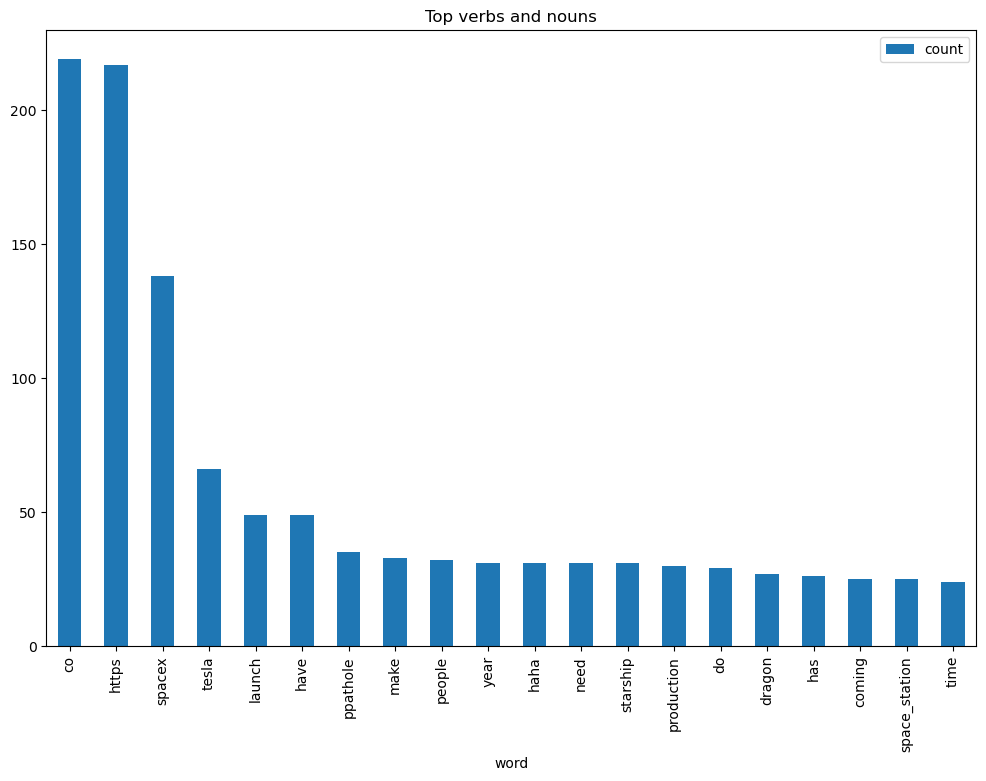

In [72]:
wf_df[0:20].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [74]:
# Emotion Mining

afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [76]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon1))
sentences

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [77]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
912  @kenyanwalstreet Not actually a payout, just a...
913  It may never pay out, as the stock can’t b… ht...
914                                    Details Aug 28.
915  AI symbiosis while u wait @vistacruiser7 @flcn...
916  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[917 rows x 1 columns]

In [78]:
# Convert the affin dataframe to dictionary
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [79]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [80]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            print(word, sentiment_lexicon.get(word.lemma_, 0))
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [81]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
@kunalb11 0
I 0
’m 0
an 0
alien 0
@ID_AA_Carmack 0
Ray 0
tracing 0
on 0
Cyberpunk 0
with 0
HDR 0
is 0
next 0
- 0
level 0
. 0
Have you tried it?
Have 0
you 0
tried 0
it 0
? 0
@joerogan @Spotify Great interview!
@joerogan 0
@Spotify 0
Great 3
interview 0
! 0
@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.
@gtera27 0
Doge 0
is 0
underestimated -1
@teslacn 0
Congratulations 0
Tesla 0
China 0
for 0
amazing 4
execution 0
last 0
year 0
. 0
Now on to the next for even more!!
Now 0
on 0
to 0
the 0
next 0
for 0
even 0
more 0
! 0
! 0
Happy New Year of the Ox!
Happy 0
New 0
Year 0
of 0
the 0
Ox 0
! 0
https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/9WFKMYu2oj 0
Frodo 0
was 0
the 0
underdoge 0
, 0

 0
All 0
thought 0
he 0
would 0
fail -2
, 0

 0
Himself 0
most 0
of 0
all 0
. 0
https://t.co/zGxJFDzzrM

@ajtourville @Erdayastronaut @SpaceX Yes, but engines have a min throttle point where there is flameout risk, so la… https://t.co/ThniYsSnWn @Adamklotz_ @Erdayastronaut @SpaceX Yes @Erdayastronaut @SpaceX It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land I am become meme,
Destroyer of shorts @commander_cruz Might actually happen Sandstorm is a masterpiece @MadOverlord We were too dumb Next time, we try pull *up* method https://t.co/J1M7WHLRDR Low-key Loki No highs, no lows, only Doge No need to be a gigachad to own Dogecoin is the people’s crypto ur welcome https://t.co/e2KF57KLxb @HuobiGlobal The most entertaining outcome is the most likely Doge https://t.co/vviUzWhodT @Erdayastronaut High seas &amp; wind This was a tough one https://t.co/beY7peFpCj RT @SpaceX: Watch Falcon 9 launch 60 Starlink satellites <U+2192> https://t.co/bJFjLCzWdK  https://t.co/Ln95rEesbW Off Twitter for a while It will be filled with graffiti art @eiraum <U+043C

@TrevorMahlmann @SpaceX Major esthetics improvements coming @teslaownersSV @DMC_Ryan A little @DMC_Ryan New Roadster is part rocket @DMC_Ryan @lafebra @Gfilche There’s more storage now &amp; easily upgradable @avalonpenrose https://t.co/djdZxQ4Maz @Couch_Investor Yes @24_7TeslaNews @WholeMarsBlog Yeah, probably in a few months @WholeMarsBlog After you drive without using a PRND stalk/stick for a few days, it gets very annoying to go back &amp; use a shifter!
@TrevorMahlmann 0
@SpaceX 0
Major 0
esthetics 0
improvements 2
coming 0
@teslaownersSV 0
@DMC_Ryan 0
A 0
little 0
@DMC_Ryan 0
New 0
Roadster 0
is 0
part 0
rocket 0
@DMC_Ryan 0
@lafebra 0
@Gfilche 0
There 0
’s 0
more 0
storage 0
now 0
& 0
amp 0
; 0
easily 0
upgradable 0
@avalonpenrose 0
https://t.co/djdZxQ4Maz 0
@Couch_Investor 0
Yes 1
@24_7TeslaNews 0
@WholeMarsBlog 0
Yeah 1
, 0
probably 0
in 0
a 0
few 0
months 0
@WholeMarsBlog 0
After 0
you 0
drive 0
without 0
using 0
a 0
PRND 0
stalk 0
/ 0
stick 0
for 0
a 0
few 0
days 0
, 0
it 0


@PPathole @johnkrausphotos @SpaceX Two of the engines need slight repairs, so will be switched out @johnkrausphotos @SpaceX Nice shot @realOmarAbdalah We don’t have high school internships, but please apply when you’re in college!
@PPathole 0
@johnkrausphotos 0
@SpaceX 0
Two 0
of 0
the 0
engines 0
need 0
slight 0
repairs 0
, 0
so 0
will 0
be 0
switched 0
out 0
@johnkrausphotos 0
@SpaceX 0
Nice 0
shot 0
@realOmarAbdalah 0
We 0
do 0
n’t 0
have 0
high 0
school 0
internships 0
, 0
but 0
please 1
apply 0
when 0
you 0
’re 0
in 0
college 0
! 0
@skorusARK Prototypes are easy, volume production is hard, positive cash flow is  excruciating @Tesla Physics RT @SpaceX: Splashdown of Dragon confirmed, completing SpaceX’s 21st @Space_Station resupply mission and the first return of a cargo resupp… @Erdayastronaut Detanking &amp; inspections now.
@skorusARK 0
Prototypes 0
are 0
easy 1
, 0
volume 0
production 0
is 0
hard -1
, 0
positive 2
cash 0
flow 0
is 0
  0
excruciating 0
@Tesla 0
Physics 0
RT 0
@S

It isn’t enough to be safer than human drivers, Aut… https://t.co/dyy2rMhgIl Ignore the heading Great interview with Mathias Döpfner
https://t.co/ewnaHc4cH0 @jack <U+0001F3A9> The Greatest Gatsby <U+0001F3A9> @flcnhvy Inspired by the ballet @smvllstvrs @ErcXspace Rocket motion is primarily vertical, so you want the top open @jack Let’s make the roaring 20’s again!
It 0
is 0
n’t 0
enough 0
to 0
be 0
safer 1
than 0
human 0
drivers 0
, 0
Aut 0
… 0
https://t.co/dyy2rMhgIl 0
Ignore -1
the 0
heading 0
Great 3
interview 0
with 0
Mathias 0
Döpfner 0

 0
https://t.co/ewnaHc4cH0 0
@jack 0
< 0
U+0001F3A9 0
> 0
The 0
Greatest 0
Gatsby 0
< 0
U+0001F3A9 0
> 0
@flcnhvy 0
Inspired 2
by 0
the 0
ballet 0
@smvllstvrs 0
@ErcXspace 0
Rocket 0
motion 0
is 0
primarily 0
vertical 0
, 0
so 0
you 0
want 1
the 0
top 2
open 0
@jack 0
Let 0
’s 0
make 0
the 0
roaring 0
20 0
’s 0
again 0
! 0
@Erdayastronaut Might be a few lumps along the way @Erdayastronaut @flcnhvy @ErcXspace Production is hard, prototypes are easy

@Erdayastronaut @teslaownersSV Sure @Erdayastronaut @teslaownersSV Haha ok @kkvr2823 @tesla_adri @teslaownersSV There are subtle, important, differences between US &amp; Canada traffic rules, bu… https://t.co/XZX9ppVL92 @tesla_adri @teslaownersSV Yes @teslaownersSV We need a “match other traffic speed” setting @stevewoz Definitely @flcnhvy @h3_extrachars It’s a step in that direction @13arm13arm It’s one <U+0001F525> or 1/2 <U+0001F525> if you don’t have a car with pedestrian speaker.
@Erdayastronaut 0
@teslaownersSV 0
Sure 0
@Erdayastronaut 0
@teslaownersSV 0
Haha 0
ok 0
@kkvr2823 0
@tesla_adri 0
@teslaownersSV 0
There 0
are 0
subtle 0
, 0
important 2
, 0
differences 0
between 0
US 0
& 0
amp 0
; 0
Canada 0
traffic 0
rules 0
, 0
bu 0
… 0
https://t.co/XZX9ppVL92 0
@tesla_adri 0
@teslaownersSV 0
Yes 1
@teslaownersSV 0
We 0
need 0
a 0
“ 0
match 0
other 0
traffic 0
speed 0
” 0
setting 0
@stevewoz 0
Definitely 0
@flcnhvy 0
@h3_extrachars 0
It 0
’s 0
a 0
step 0
in 0
that 0
direction 0
@13arm

@elonmusk #spacex #SpaceXStarship https://t.co/ynEtMywFvg @conexionspacial @Pockn_CG Yes @SpacePadreIsle @SpaceX Agreed, should be preserved in memory of SN8 RT @SpaceX: Photos from Starship SN8’s flight test <U+2192> https://t.co/095WHX44BX https://t.co/5OzLYF7QRf @NASASpaceflight @BocaChicaGal Exactly!
@elonmusk 0
# 0
spacex 0
# 0
SpaceXStarship 0
https://t.co/ynEtMywFvg 0
@conexionspacial 0
@Pockn_CG 0
Yes 1
@SpacePadreIsle 0
@SpaceX 0
Agreed 0
, 0
should 0
be 0
preserved 0
in 0
memory 0
of 0
SN8 0
RT 0
@SpaceX 0
: 0
Photos 0
from 0
Starship 0
SN8 0
’s 0
flight 0
test 0
< 0
U+2192 0
> 0
https://t.co/095WHX44BX 0
https://t.co/5OzLYF7QRf 0
@NASASpaceflight 0
@BocaChicaGal 0
Exactly 0
! 0
Woohoo!!
Woohoo 0
! 0
! 0
@Erdayastronaut @SpaceX SN8 did great!
@Erdayastronaut 0
@SpaceX 0
SN8 0
did 0
great 3
! 0
Even reaching apogee would’ve been great, so controlling all way to putting… https://t.co/xwm1fxmX0R Thank you, South Texas for your support!
Even 0
reaching 1
apogee 0
would 0
’ve 0
be

Aiming for first 15km / ~50k ft altitude flight next week.
Aiming 0
for 0
first 0
15 0
km 0
/ 0
~50k 0
ft 0
altitude 0
flight 0
next 0
week 0
. 0
Goals are to test 3 engin… https://t.co/7OjorqNhb6 @Erdayastronaut @MarcusHouseGame Maybe start on that a year from now.
Goals 0
are 0
to 0
test 0
3 0
engin 0
… 0
https://t.co/7OjorqNhb6 0
@Erdayastronaut 0
@MarcusHouseGame 0
Maybe 0
start 0
on 0
that 0
a 0
year 0
from 0
now 0
. 0
Depends on how Starship progress goes.
Depends 0
on 0
how 0
Starship 0
progress 2
goes 0
. 0
@RationalEtienne @MarcusHouseGame Not yet @StarshipFairing @MarcusHouseGame Not bad!
@RationalEtienne 0
@MarcusHouseGame 0
Not 0
yet 0
@StarshipFairing 0
@MarcusHouseGame 0
Not 0
bad -3
! 0
We will definitely need more engines if we make the cargo bay all propel… https://t.co/j2uVULTatv @MarcusHouseGame Rapid &amp; complete rocket reuse, low cost propellant, orbital refilling &amp; propellant production at d… https://t.co/UmyUR7yShY @Erdayastronaut @PPathole @Teslarati @Tesl

@AstroJordy @flcnhvy Yeah @Daywalker_xD @Astronomiaum I was going to say “Sim!”, but that seemed too obvious haha @Astronomiaum Deveras!
@AstroJordy 0
@flcnhvy 0
Yeah 1
@Daywalker_xD 0
@Astronomiaum 0
I 0
was 0
going 0
to 0
say 0
“ 0
Sim 0
! 0
” 0
, 0
but 0
that 0
seemed 0
too 0
obvious 0
haha 3
@Astronomiaum 0
Deveras 0
! 0
@flcnhvy And cases with high (non-infectious) Ct should quarantine for a few days, while getting another test.
@flcnhvy 0
And 0
cases 0
with 0
high 0
( 0
non 0
- 0
infectious 0
) 0
Ct 0
should 0
quarantine 0
for 0
a 0
few 0
days 0
, 0
while 0
getting 0
another 0
test 0
. 0
Seco… https://t.co/oAlvZwCMIO @tobyliiiiiiiiii So many things you want &amp; some you didn’t know you wanted @nichegamer Maybe a little Mercy … https://t.co/9iE40HOihr Tesla holiday software release is <U+0001F525><U+0001F525> @StaceyR28715306 @Maisie_Williams <U+0001F60F> Cobra Kai is a deep cut @archillect It’s all cake &amp; someone took a bite @nichegamer There is such a thing as too much sen

Last week, I had sym… https://t.co/gL0mhrqJxY @PPathole @AstroJordy @erujabidi Doing tests from several different labs, same time of day, administered by RN &amp; am… https://t.co/hajhh7La7Q @PPathole @Mario_Livio Both obv insanely great, too bad they had this pointless argument Astronaut launch today!
Last 0
week 0
, 0
I 0
had 0
sym 0
… 0
https://t.co/gL0mhrqJxY 0
@PPathole 0
@AstroJordy 0
@erujabidi 0
Doing 0
tests 0
from 0
several 0
different 0
labs 0
, 0
same 0
time 0
of 0
day 0
, 0
administered 0
by 0
RN 0
& 0
amp 0
; 0
am 0
… 0
https://t.co/hajhh7La7Q 0
@PPathole 0
@Mario_Livio 0
Both 0
obv 0
insanely 0
great 3
, 0
too 0
bad -3
they 0
had 0
this 0
pointless 0
argument 0
Astronaut 0
launch 0
today 0
! 0
https://t.co/3FAzZGss8c RT @NASA: <U+0001F338> @Astro_Soichi has a message for boys and girls in Japan: "Space is waiting!"
https://t.co/3FAzZGss8c 0
RT 0
@NASA 0
: 0
< 0
U+0001F338 0
> 0
@Astro_Soichi 0
has 0
a 0
message 0
for 0
boys 0
and 0
girls 0
in 0
Japan 0
: 0
" 0
Space 0
is

Was tested for covid four times today.
Was 0
tested 0
for 0
covid 0
four 0
times 0
today 0
. 0
Two tests came back negative, two cam… https://t.co/Z2V15u7Zcf @austinbarnard45 Burst disk worked, so vehicle appears to be ok. We’ll have to swap out at least one of the engines.
Two 0
tests 0
came 0
back 0
negative -2
, 0
two 0
cam 0
… 0
https://t.co/Z2V15u7Zcf 0
@austinbarnard45 0
Burst 0
disk 0
worked 0
, 0
so 0
vehicle 0
appears 0
to 0
be 0
ok 0
. 0
We 0
’ll 0
have 0
to 0
swap 0
out 0
at 0
least 0
one 0
of 0
the 0
engines 0
. 0
@tobyliiiiiiiiii @SpacePadreIsle @austinbarnard45 Maybe melted an engine preburner or fuel hot gas manifold.
@tobyliiiiiiiiii 0
@SpacePadreIsle 0
@austinbarnard45 0
Maybe 0
melted 0
an 0
engine 0
preburner 0
or 0
fuel 0
hot 0
gas 0
manifold 0
. 0
Whatev… https://t.co/5elyX8PjlG @austinbarnard45 We lost vehicle pneumatics.
Whatev 0
… 0
https://t.co/5elyX8PjlG 0
@austinbarnard45 0
We 0
lost 0
vehicle 0
pneumatics 0
. 0
Reason unknown at present.
Reason 0
unknown 0
a

@enn_nafnlaus @flcnhvy Didn’t realize that was possible.
@enn_nafnlaus 0
@flcnhvy 0
Did 0
n’t 0
realize 0
that 0
was 0
possible 0
. 0
No problem if there’s a way get current design Cybertruck approved in Europe!
No -1
problem -2
if 0
there 0
’s 0
a 0
way 0
get 0
current 0
design 0
Cybertruck 0
approved 0
in 0
Europe 0
! 0
@flcnhvy As soon as we get country approval.
@flcnhvy 0
As 0
soon 0
as 0
we 0
get 0
country 0
approval 2
. 0
This is required for each country individually, as no EU-wide approval… https://t.co/8ZBt9qJD9H @jason_rassett Lower latitude states need more satellites in position, so probably January Several thousand more Starlink beta participation invitations going out this week @LouisWFerreira New design is better with many minor tweaks.
This 0
is 0
required 0
for 0
each 0
country 0
individually 0
, 0
as 0
no -1
EU 0
- 0
wide 0
approval 2
… 0
https://t.co/8ZBt9qJD9H 0
@jason_rassett 0
Lower 0
latitude 0
states 0
need 0
more 0
satellites 0
in 0
position 0
, 0
so 0
probabl

@Erdayastronaut Video training &amp; inference is essential for excellent autonomy @engineers_feed Sigh … there should be a new supersonic jet, this time electric @WorldAndScience Critical to humanity’s future Congratulations SpaceX Team!
@Erdayastronaut 0
Video 0
training 0
& 0
amp 0
; 0
inference 0
is 0
essential 0
for 0
excellent 3
autonomy 0
@engineers_feed 0
Sigh 0
… 0
there 0
should 0
be 0
a 0
new 0
supersonic 0
jet 0
, 0
this 0
time 0
electric 0
@WorldAndScience 0
Critical 0
to 0
humanity 0
’s 0
future 0
Congratulations 0
SpaceX 0
Team 0
! 0
https://t.co/nO1Z98a94f @TesLatino Mine is a few days ahead @EliBurton_ @teslaownersSV Sure, it could be an option in settings @teslaownersSV Visualization will tone down significantly for production.
https://t.co/nO1Z98a94f 0
@TesLatino 0
Mine 0
is 0
a 0
few 0
days 0
ahead 0
@EliBurton 0
_ 0
@teslaownersSV 0
Sure 0
, 0
it 0
could 0
be 0
an 0
option 0
in 0
settings 0
@teslaownersSV 0
Visualization 0
will 0
tone 0
down 0
significantly 0
for 0

@lexfridman Nice “What is love?
@lexfridman 0
Nice 0
“ 0
What 0
is 0
love 3
? 0
Baby don’t hurt me.”— Winston Churchill @PlayOverwatch @twomad Or maybe 2 weak turrets to allow more strategic degrees of freedom @PlayOverwatch @twomad Please buff Torb’s turret!
Baby 0
do 0
n’t 0
hurt -2
me 0
. 0
” 0
— 0
Winston 0
Churchill 0
@PlayOverwatch 0
@twomad 0
Or 0
maybe 0
2 0
weak -2
turrets 0
to 0
allow 1
more 0
strategic 0
degrees 0
of 0
freedom 2
@PlayOverwatch 0
@twomad 0
Please 1
buff 0
Torb 0
’s 0
turret 0
! 0
@twomad Um … yes @teslaownersSV I have Goosebumps 2 merch.
@twomad 0
Um 0
… 0
yes 1
@teslaownersSV 0
I 0
have 0
Goosebumps 0
2 0
merch 0
. 0
Not sure how tbh.
Not 0
sure 0
how 0
tbh 0
. 0
@teslaownersSV HG2G @teslaownersSV LotR <U+0001F918> The Illuminaughty <U+0001F918> @ChotiHaque @BillGates @DougStanhope @bobdylan @charltonbrooker @EricIdle @JimCarrey @JohnCleese @sapinker Knee deep RT @SpaceX: This will be the first flight of the upgraded cargo version of Dragon, which is able to

Most type, pointer (or other memory) problems can be detected at comp… https://t.co/n3rZP4uDI1 @RGVaerialphotos @SpaceX I’m proud to say that that nose is pointier than it needs to be haha RT @MotorTrend: We put the 2020 @Tesla Model Y Long Range electric SUV on our test track to find out what it can do—and it turns out, well,… @SDG2030 @anandmahindra @MetniGeorges @ErikSolheim @berniehollywood Norway leads the world @NASASpaceflight Passed cryo proof @johnkrausphotos @SuperclusterHQ @SpaceX <U+0001F44D> @ajtourville Yeah, it’s not a contest.
Most 0
type 0
, 0
pointer 0
( 0
or 0
other 0
memory 0
) 0
problems -2
can 0
be 0
detected 0
at 0
comp 0
… 0
https://t.co/n3rZP4uDI1 0
@RGVaerialphotos 0
@SpaceX 0
I 0
’m 0
proud 2
to 0
say 0
that 0
that 0
nose 0
is 0
pointier 0
than 0
it 0
needs 0
to 0
be 0
haha 3
RT 0
@MotorTrend 0
: 0
We 0
put 0
the 0
2020 0
@Tesla 0
Model 0
Y 0
Long 0
Range 0
electric 0
SUV 0
on 0
our 0
test 0
track 0
to 0
find 0
out 0
what 0
it 0
can 0
do 0
— 0
and 0
it 0
turn

Still awesome.
Still 0
awesome 4
. 0
Ovaltine?
Ovaltine 0
? 0
https://t.co/WiMdyFSuiq @flcnhvy The remake has the potential to be great.
https://t.co/WiMdyFSuiq 0
@flcnhvy 0
The 0
remake 0
has 0
the 0
potential 0
to 0
be 0
great 3
. 0
I kinda liked the original tbh, but it’s possible to take it up a level.
I 0
kinda 0
liked 2
the 0
original 0
tbh 0
, 0
but 0
it 0
’s 0
possible 0
to 0
take 0
it 0
up 0
a 0
level 0
. 0
Hollywood should just start with the sequel &amp; skip the original, because financials @cleantechnica This article is wildly incorrect about lithium battery costs by a factor of 5 or more presently &amp; 10X long-term @SamTalksTesla @teslaownersSV @PPathole @RationalEtienne @stevenmarkryan @Kristennetten @WholeMarsBlog Pretty wild,… https://t.co/8PQh2kaLCF New SpaceX droneship will be called “A Shortfall of Gravitas” Nothing can escape gravity, not even black holes (and they really tried!)
Hollywood 0
should 0
just 0
start 0
with 0
the 0
sequel 0
& 0
amp 0
; 0
skip 0
the 0

When the crew arrives for… RT @SpaceX: After launch of Crew Dragon’s first operational mission with astronauts on board, SpaceX will launch its 21st cargo resupply mi… @SamTalksTesla Maybe we used too many magenta spotlights RT @KathyLueders: NEWS: We’re now targeting 2:40am ET Saturday, Oct. 31, for the launch of the @NASA and @SpaceX Crew-1 mission to send ast… @ValaAfshar @Tesla Having a low center of gravity makes a world of difference to safety @vm_one1 @waEMD @SpaceX We will probably IPO Starlink, but only several years in the future when revenue growth is… https://t.co/kH4QryrKOe @PerezShivam @waEMD @SpaceX Fate loooves irony haha @waEMD @SpaceX Glad SpaceX could help!
When 0
the 0
crew 0
arrives 0
for 0
… 0
RT 0
@SpaceX 0
: 0
After 0
launch 0
of 0
Crew 0
Dragon 0
’s 0
first 0
operational 0
mission 0
with 0
astronauts 0
on 0
board 0
, 0
SpaceX 0
will 0
launch 0
its 0
21st 0
cargo 0
resupply 0
mi 0
… 0
@SamTalksTesla 0
Maybe 0
we 0
used 0
too 0
many 0
magenta 0
spotlights 0
RT 0


@RGVaerialphotos ~9007mm @MarlonSIX60 Something appealing about Hawking/Hartle idea, but I agree with Turok/Feldbrugge/Lehners @muratpak <U+0001F5A4> ur algo @PPathole @MarlonSIX60 True @PPathole @Erdayastronaut There are some practical size constraints too.
@RGVaerialphotos 0
~9007 0
mm 0
@MarlonSIX60 0
Something 0
appealing 0
about 0
Hawking 0
/ 0
Hartle 0
idea 0
, 0
but 0
I 0
agree 1
with 0
Turok 0
/ 0
Feldbrugge 0
/ 0
Lehners 0
@muratpak 0
< 0
U+0001F5A4 0
> 0
ur 0
algo 0
@PPathole 0
@MarlonSIX60 0
True 0
@PPathole 0
@Erdayastronaut 0
There 0
are 0
some 0
practical 0
size 0
constraints 0
too 0
. 0
Can’t be too big to fit in the engine comp… https://t.co/aXz1YhEldj @PPathole @Erdayastronaut Doesn’t seem to be a problem.
Ca 0
n’t 0
be 0
too 0
big 1
to 0
fit 1
in 0
the 0
engine 0
comp 0
… 0
https://t.co/aXz1YhEldj 0
@PPathole 0
@Erdayastronaut 0
Does 0
n’t 0
seem 0
to 0
be 0
a 0
problem -2
. 0
We could probably increase area ratio, given 330 bar max de… https://t.co/0gutz4Kgij @Marlon

If SN8 craters, SN9 &amp; SN10 are close behind… https://t.co/wvQFq4OqUA @teslavibes Couldn’t agree more — major software improvements are already in place to extend its life &amp; more coming @cleantechnica Definitely not.
If 0
SN8 0
craters 0
, 0
SN9 0
& 0
amp 0
; 0
SN10 0
are 0
close 0
behind 0
… 0
https://t.co/wvQFq4OqUA 0
@teslavibes 0
Could 0
n’t 0
agree 1
more 0
— 0
major 0
software 0
improvements 2
are 0
already 0
in 0
place 0
to 0
extend 1
its 0
life 0
& 0
amp 0
; 0
more 0
coming 0
@cleantechnica 0
Definitely 0
not 0
. 0
Smartwatches &amp; phones are yesterday’s technology, Neuralinks are the future.
Smartwatches 0
& 0
amp 0
; 0
phones 0
are 0
yesterday 0
’s 0
technology 0
, 0
Neuralinks 0
are 0
the 0
future 0
. 0
@engineers_feed Seems like they should make a whole outfit out of that material @sama Ancient Greece had it all &amp; then committed suicide.
@engineers_feed 0
Seems 0
like 2
they 0
should 0
make 0
a 0
whole 0
outfit 0
out 0
of 0
that 0
material 0
@sama 0
Ancient 0
G

It’s just lo… https://t.co/t42iuaZMwH @Erdayastronaut @PPathole @SpaceX Above 50% likely to make it @PPathole @SpaceX This is a test engine.
It 0
’s 0
just 0
lo 0
… 0
https://t.co/t42iuaZMwH 0
@Erdayastronaut 0
@PPathole 0
@SpaceX 0
Above 0
50 0
% 0
likely 0
to 0
make 0
it 0
@PPathole 0
@SpaceX 0
This 0
is 0
a 0
test 0
engine 0
. 0
Flight articles are fixed with no gimbal.
Flight 0
articles 0
are 0
fixed 0
with 0
no -1
gimbal 0
. 0
@SpaceX Worth noting that thrust is only slightly higher with the big bell nozzle version.
@SpaceX 0
Worth 0
noting 0
that 0
thrust 0
is 0
only 0
slightly 0
higher 0
with 0
the 0
big 1
bell 0
nozzle 0
version 0
. 0
Larger bell is primarily… https://t.co/KIeGOvt0rD RT @SpaceX: The first Raptor Vacuum engine (RVac) for Starship has shipped from SpaceX’s rocket factory in Hawthorne, California to our dev… @Tesmanian_com Yes @skorusARK Chart understates lithium-ion potential by roughly 1/3 Model 3 rated as most reliable car https://t.co/26DAGJLTDY Turns out you 

Very ba… https://t.co/tJsh1Exz1Q @justpaulinelol It’s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing… https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.
Very 0
ba 0
… 0
https://t.co/tJsh1Exz1Q 0
@justpaulinelol 0
It 0
’s 0
too 0
embarrassing -2
Just 0
learned 0
that 0
my 0
physics 0
prof 0
from 0
Penn 0
is 0
head 0
of 0
Fermilab 0
& 0
amp 0
; 0
still 0
has 0
some 0
of 0
my 0
old 0
homework 0
< 0
U+263A><U+FE0F 0
> 0
@ruskin147 0
It 0
is 0
unfortunately 0
common 0
for 0
many 0
in 0
academia 0
to 0
overweight -1
the 0
value 0
of 0
ideas 0
& 0
amp 0
; 0
underweight 0
bringing 0
… 0
https://t.co/OFFoojCqNv 0
@l_vaux 0
@kulpability 0
@tlowdon 0
@EthicalSkeptic 0
People 0
are 0
extremely 0
unlikely 0
to 0

Just needs to be at a fair distance &amp; not coming r… https://t.co/hsPkw3Zk1Y @GerberKawasaki @Tesla Thanks to a smart and hardworking team at Tesla.
Just 0
needs 0
to 0
be 0
at 0
a 0
fair 2
distance 0
& 0
amp 0
; 0
not 0
coming 0
r 0
… 0
https://t.co/hsPkw3Zk1Y 0
@GerberKawasaki 0
@Tesla 0
Thanks 2
to 0
a 0
smart 1
and 0
hardworking 0
team 0
at 0
Tesla 0
. 0
These sure are wild times … @Teslarati Much appreciated.
These 0
sure 0
are 0
wild 0
times 0
… 0
@Teslarati 0
Much 0
appreciated 2
. 0
This was a serious attack.
This 0
was 0
a 0
serious 0
attack -1
. 0
@thejackbeyer @NASASpaceflight Brave Starhopper carried the day @ItMotivatesUs Only so many days @waitbutwhy https://t.co/19h4u8TA2a @WholeMarsBlog We were too obtuse for our own good, although I think it works esthetically.
@thejackbeyer 0
@NASASpaceflight 0
Brave 0
Starhopper 0
carried 0
the 0
day 0
@ItMotivatesUs 0
Only 0
so 0
many 0
days 0
@waitbutwhy 0
https://t.co/19h4u8TA2a 0
@WholeMarsBlog 0
We 0
were 0
too 0
obtuse 0
for

Snake Jazz.
Snake 0
Jazz 0
. 0
<U+0001F40D><U+0001F3B7> @WholeMarsBlog It’s quite hard for us to write the software needed to cover basic car functionality, but maybe we c… https://t.co/YWLQuX5rbv GPT-3 sounds like Simon &amp; Garfunkel lyrics Bureaucracy is inherently kafkaesque @Tesmanian_com Dankeschön Brandenburg &amp; Grünheide!
< 0
U+0001F40D><U+0001F3B7 0
> 0
@WholeMarsBlog 0
It 0
’s 0
quite 0
hard -1
for 0
us 0
to 0
write 0
the 0
software 0
needed 0
to 0
cover 0
basic 0
car 0
functionality 0
, 0
but 0
maybe 0
we 0
c 0
… 0
https://t.co/YWLQuX5rbv 0
GPT-3 0
sounds 0
like 2
Simon 0
& 0
amp 0
; 0
Garfunkel 0
lyrics 0
Bureaucracy 0
is 0
inherently 0
kafkaesque 0
@Tesmanian_com 0
Dankeschön 0
Brandenburg 0
& 0
amp 0
; 0
Grünheide 0
! 0
@harsimranbansal @EvaFoxU True <U+0001F923><U+0001F923> @GeffenAvraham @BryanFlanks @SpellMender @VladKarmon @torybruno @ULAEngineer @SpaceX <U+0001F446> Medical check is A-ok!
@harsimranbansal 0
@EvaFoxU 0
True 0
< 0
U+0001F923><U+0001F923 0
> 0
@Geff

For reference, 330 bar on R… https://t.co/vk8NzLR0SZ Raptor engine just reached 330 bar chamber pressure without exploding!
For 0
reference 0
, 0
330 0
bar 0
on 0
R 0
… 0
https://t.co/vk8NzLR0SZ 0
Raptor 0
engine 0
just 0
reached 1
330 0
bar 0
chamber 0
pressure -1
without 0
exploding 0
! 0
https://t.co/kVKRWksvaB @Erdayastronaut Yeah, Starship will be a tiny dot at 20km.
https://t.co/kVKRWksvaB 0
@Erdayastronaut 0
Yeah 1
, 0
Starship 0
will 0
be 0
a 0
tiny 0
dot 0
at 0
20 0
km 0
. 0
Hard to see with naked eye.
Hard -1
to 0
see 0
with 0
naked 0
eye 0
. 0
We’ll do lots of flights.
We 0
’ll 0
do 0
lots 0
of 0
flights 0
. 0
@C_Bass3d @Erdayastronaut @NASASpaceflight @FelixSchlang Very impressive render.
@C_Bass3d 0
@Erdayastronaut 0
@NASASpaceflight 0
@FelixSchlang 0
Very 0
impressive 3
render 0
. 0
Note, legs will be bigger &amp; there’… https://t.co/uP3t8oW5tF @PPathole @universal_sci This might sting a little … @PPathole The “early investor” part of Tesla is wrong.
Note 0
, 0
legs 0
wi

Need bigger sections of tiles to see how they hold up… https://t.co/XNIPTypahf SN7 will be new alloy test tank taken to burst pressure.
Need 0
bigger 1
sections 0
of 0
tiles 0
to 0
see 0
how 0
they 0
hold 0
up 0
… 0
https://t.co/XNIPTypahf 0
SN7 0
will 0
be 0
new 0
alloy 0
test 0
tank 0
taken 0
to 0
burst 0
pressure -1
. 0
SN8 will have body flaps &amp; nosecone.
SN8 0
will 0
have 0
body 0
flaps 0
& 0
amp 0
; 0
nosecone 0
. 0
SN 5 &amp; 6 at Starship Production Complex in Texas https://t.co/8BVRD5VdU7 @Mark_Goldberg_ @Tesla One day soon, I will wear this outfit https://t.co/T0SnF4UgYK @Mark_Goldberg_ @Tesla I was trying to channel Herb Tarlek from WKRP https://t.co/0RC72S0ZAY @Mark_Goldberg_ @Tesla Note the fabulous plaid jacket &amp; gingham shirt combo <U+0001F923> @archillect Twin Peaks @SamTalksTesla Working on my Mom’s cousin’s farm in Saskatchewan at age 17.
SN 0
5 0
& 0
amp 0
; 0
6 0
at 0
Starship 0
Production 0
Complex 0
in 0
Texas 0
https://t.co/8BVRD5VdU7 0
@Mark_Goldberg 0
_

RT @RealLifeStarman: “We are going to go to the moon, we are going to have a base on the moon, we are going to send people to mars and make… @Erdayastronaut @SpaceX For sure @engineers_feed Tbh, I must confess to occasionally pontificating about high-concept things @engineers_feed Pretty much @Erdayastronaut Nosecone closing is recommended, but not required, for safe entry When space travel becomes as common as air travel, the future of civilization will be assured RT @NASA: "To anybody who has touched Endeavour, you should take a moment to just cherish this day."
RT 0
@RealLifeStarman 0
: 0
“ 0
We 0
are 0
going 0
to 0
go 0
to 0
the 0
moon 0
, 0
we 0
are 0
going 0
to 0
have 0
a 0
base 0
on 0
the 0
moon 0
, 0
we 0
are 0
going 0
to 0
send 0
people 0
to 0
mars 0
and 0
make 0
… 0
@Erdayastronaut 0
@SpaceX 0
For 0
sure 0
@engineers_feed 0
Tbh 0
, 0
I 0
must 0
confess 0
to 0
occasionally 0
pontificating 0
about 0
high 0
- 0
concept 0
things 0
@engineers_feed 0
Pretty 1
much 0
@Erdayastronaut

<U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0F>Total Eclipse of the Heart <U+0001F9DB><U+200D><U+2640><U+FE0F><U+0001F5A4> https://t.co/n8djdlKnbE @lnterestingMaps @Iearnsomethlng <U+0001F62E> @bluemoondance74 @PPathole @flcnhvy @shravantr @Neuro_Skeptic Not that I’m aware of @PPathole @flcnhvy @shravantr @Neuro_Skeptic Yes.
< 0
U+0001F5A4><U+0001F9DB><U+200D><U+2640><U+FE0F 0
> 0
Total 0
Eclipse 0
of 0
the 0
Heart 0
< 0
U+0001F9DB><U+200D><U+2640><U+FE0F><U+0001F5A4 0
> 0
https://t.co/n8djdlKnbE 0
@lnterestingMaps 0
@Iearnsomethlng 0
< 0
U+0001F62E 0
> 0
@bluemoondance74 0
@PPathole 0
@flcnhvy 0
@shravantr 0
@Neuro_Skeptic 0
Not 0
that 0
I 0
’m 0
aware 0
of 0
@PPathole 0
@flcnhvy 0
@shravantr 0
@Neuro_Skeptic 0
Yes 1
. 0
Could also extend range of hearing beyond normal frequencies and amplitudes.
Could 0
also 0
extend 1
range 0
of 0
hearing 0
beyond 0
normal 0
frequencies 0
and 0
amplitudes 0
. 0
Deus Ex.
Deus 0
Ex 0
. 0
@flcnhvy @shravantr @Neuro_Skeptic Neuralinks are currently mea

Haven’t heard that name in years … <U+0001F339> Twitter sucks @stevenbonchev @APompliano Something like that.
Have 0
n’t 0
heard 0
that 0
name 0
in 0
years 0
… 0
< 0
U+0001F339 0
> 0
Twitter 0
sucks -3
@stevenbonchev 0
@APompliano 0
Something 0
like 2
that 0
. 0
If politicians could legislate wealth, everyone would be a trillionaire.
If 0
politicians 0
could 0
legislate 0
wealth 3
, 0
everyone 0
would 0
be 0
a 0
trillionaire 0
. 0
These are jammed to gills with special interests earmarks.
These 0
are 0
jammed 0
to 0
gills 0
with 0
special 0
interests 1
earmarks 0
. 0
If we do a stimulus at all, it should just be direct payments to consumers.
If 0
we 0
do 0
a 0
stimulus 0
at 0
all 0
, 0
it 0
should 0
just 0
be 0
direct 0
payments 0
to 0
consumers 0
. 0
@PPathole Pretty much Goal of government should be to maximize the happiness of the people.
@PPathole 0
Pretty 1
much 0
Goal 0
of 0
government 0
should 0
be 0
to 0
maximize 0
the 0
happiness 3
of 0
the 0
people 0
. 0
Giving each person mo

I… https://t.co/AnIte06dlj @teslaownersSV @waitbutwhy It’s not really set up for tours, but maybe it should @AstroBehnken @SpaceX @NASA @Space_Station Manufactured only 5 mins from LAX!
I 0
… 0
https://t.co/AnIte06dlj 0
@teslaownersSV 0
@waitbutwhy 0
It 0
’s 0
not 0
really 0
set 0
up 0
for 0
tours 0
, 0
but 0
maybe 0
it 0
should 0
@AstroBehnken 0
@SpaceX 0
@NASA 0
@Space_Station 0
Manufactured 0
only 0
5 0
mins 0
from 0
LAX 0
! 0
@waitbutwhy Some contribute more.
@waitbutwhy 0
Some 0
contribute 0
more 0
. 0
Y chromosome &amp; mitochondria are constant, except for mutations.
Y 0
chromosome 0
& 0
amp 0
; 0
mitochondria 0
are 0
constant 0
, 0
except 0
for 0
mutations 0
. 0
@BWillOfficial @WholeMarsBlog @neuralink Yes @Kristennetten That is just one part of the surgery.
@BWillOfficial 0
@WholeMarsBlog 0
@neuralink 0
Yes 1
@Kristennetten 0
That 0
is 0
just 0
one 0
part 0
of 0
the 0
surgery 0
. 0
For this to scale, it must be fully automated, like LASIK.
For 0
this 0
to 0
scale 0
, 0
it 0
mu

Everything we’ve ever sensed or thought has been… https://t.co/B3ZXD384qD @redmercy Yes @buzzindelhi Sorry, should hopefully be soon!
Everything 0
we 0
’ve 0
ever 0
sensed 0
or 0
thought 0
has 0
been 0
… 0
https://t.co/B3ZXD384qD 0
@redmercy 0
Yes 1
@buzzindelhi 0
Sorry -1
, 0
should 0
hopefully 2
be 0
soon 0
! 0
@kenyanwalstreet Not actually a payout, just a vesting of stock options.
@kenyanwalstreet 0
Not 0
actually 0
a 0
payout 0
, 0
just 0
a 0
vesting 0
of 0
stock 0
options 0
. 0
It may never pay out, as the stock can’t b… https://t.co/8Zg37STXT9 @IheartTesla No easy way to answer this in a tweet, but helping with dire brain injuries is our first priority.
It 0
may 0
never 0
pay -1
out 0
, 0
as 0
the 0
stock 0
ca 0
n’t 0
b 0
… 0
https://t.co/8Zg37STXT9 0
@IheartTesla 0
No -1
easy 1
way 0
to 0
answer 0
this 0
in 0
a 0
tweet 0
, 0
but 0
helping 2
with 0
dire -3
brain 0
injuries -2
is 0
our 0
first 0
priority 0
. 0
Details Aug 28.
Details 0
Aug 0
28 0
. 0
AI symbiosis while u wait @vi

In [82]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [83]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
159  @harsimranbansal @heydave7 It will most likely...               11   
811  Might be able to… https://t.co/FB7e5nOq2E @Pri...               11   
224  @PPathole @karpathy For a second there, I thou...               11   
184  Also, w… https://t.co/IYdKttVsqk @cleantechnic...               12   
80   @teslaownersSV This is a good one @MrBeastYT I...               13   
641  It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
581  The “open” areas… https://t.co/rabjKrtQlw @Sav...               14   
104  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
713  We just haven’t observed the… https://t.co/mez...               17   

     word_count  
159          93  
811          72  
224          69  
184          99  
80           38  
641          65  
581         138  
104          94  
36          231  
713          72

In [84]:
sent_df['sentiment_value'].describe()

count    917.000000
mean       1.355507
std        2.697262
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [85]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 I’m an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
912  @kenyanwalstreet Not actually a payout, just a...                0   
913  It may never pay out, as the stock can’t b… ht...               -4   
914                                    Details Aug 28.                0   
915  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
916  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
912          11  
913          31  
914           3  
915          47  
916          15  

[485 rows x 3 columns]

In [86]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [87]:
sent_df['index']=range(0,len(sent_df))

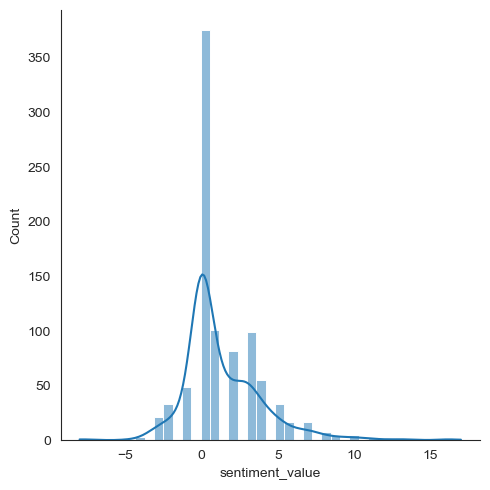

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<Axes: xlabel='index', ylabel='sentiment_value'>

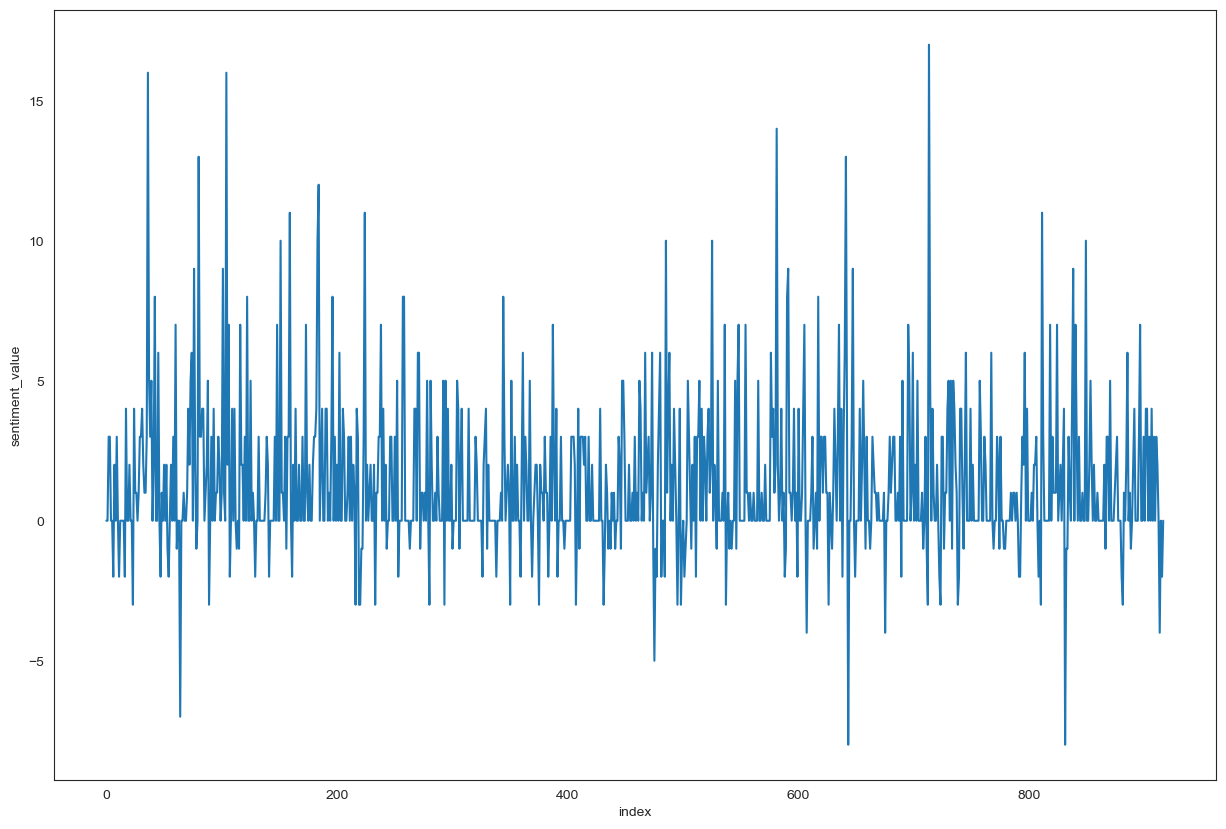

In [89]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)